# Homework 4: Functions, Histograms, and Groups

**Reading**: 

* [Visualizing Numerical Distributions](https://www.inferentialthinking.com/chapters/07/2/visualizing-numerical-distributions.html) 
* [Functions and Tables](https://www.inferentialthinking.com/chapters/08/functions-and-tables.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 4 is due Tuesday the 24th at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule, and post questions to the Slack channel.

Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

In [90]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw04.ok')
_ = ok.auth(inline=True)

Assignment: Homework 4: Functions, Histograms, and Groups
OK, version v1.14.15

Successfully logged in as rga2uz@virginia.edu


## 1. Working with Text using Functions


The following table contains the words from four chapters of Charles Dickens' [*A Tale of Two Cities*](http://www.gutenberg.org/cache/epub/98/pg98.txt).  We're going to compute some simple facts about each chapter.  Since we're performing the same computation on each chapter, it's best to encapsulate each computational procedure in a function, and then call the function several times. Run the cell to get a table with one column.

In [91]:
# Just run this cell to load the data.
tale_chapters = Table.read_table("tale.csv")
tale_chapters

Chapter text
"I. The Period It was the best of times, it was the wor ..."
"II. The Mail It was the Dover road that lay, on a Frid ..."
III. The Night Shadows A wonderful fact to reflect upo ...
IV. The Preparation When the mail got successfully to ...


**Question 1.** Write a function called `word_count` that takes a single argument, the text of a single chapter, and returns the number of words in that chapter.  Assume that words are separated from each other by spaces. 

*Hint:* Try the string method [`split`](https://docs.python.org/3/library/stdtypes.html#str.split) and the function [`len`](https://docs.python.org/3/library/functions.html#len).

In [92]:
def word_count(text):
    return len(text.split(" "))

word_count(tale_chapters.column("Chapter text").item(0))

911

In [93]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Create an array called `chapter_lengths` which contains the length of each chapter in `tale_chapters`.

**Hint:** Consider using `apply` along with the function you have defined in the previous question.

In [94]:
chapter_lengths = tale_chapters.apply(word_count, "Chapter text")
chapter_lengths

array([ 911, 1827, 1468, 3994])

In [95]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Write a function called `character_count`.  It should take a string as its argument and return the number of characters in that string that aren't spaces (" "), periods ("."), exclamation marks ("!"), or question marks ("?"). Remember that `tale_chapters` is a table, and that the function takes in only the text of one chapter as input.

*Hint:* Try using the string method `replace` several times to remove the characters we don't want to count.

In [96]:
def character_count(string):
    return len(string.replace(" ","").replace(".","").replace("!","").replace("?",""))

In [97]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Write a function called `chapter_number`.  It should take a single argument, the text of a chapter from our dataset, and return the number of that chapter, as a Roman numeral.  (For example, it should return the string "I" for the first chapter and "II" for the second.)  If the argument doesn't have a chapter number in the same place as the chapters in our dataset, `chapter_number` can return whatever you like.

To help you with this, we've included a function called `text_before`.  Its documentation describes what it does.

In [98]:
def text_before(full_text, pattern):
    """Finds all the text that occurs in full_text before the specified pattern.

    Parameters
    ----------
    full_text : str
        The text we want to search within.
    pattern : str
        The thing we want to search for.

    Returns
    -------
    str
        All the text that occurs in full_text before pattern.  If pattern
        doesn't appear anywhere, all of full_text is returned.
    
    Examples
    --------
    
    >>> text_before("The rain in Spain falls mainly on the plain.", "Spain")
    'The rain in '
    >>> text_before("The rain in Spain falls mainly on the plain.", "ain")
    'The r'
    >>> text_before("The rain in Spain falls mainly on the plain.", "Portugal")
    'The rain in Spain falls mainly on the plain.'
    """
    return np.array(full_text.split(pattern)).item(0)

def chapter_number(chapter_text):
    return text_before(chapter_text, ".")

In [99]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Uber


Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` table contains the length of the ride, in minutes.

In [100]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston Table")
boston.show(4)
print("Manila Table")
manila.show(4)

Boston Table


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila Table


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


**Question 1.**
Produce histograms of all ride times in Boston and in Manila, using the given bins. Please put the code for both of them in the following cell, and put the ride times for Boston first.  

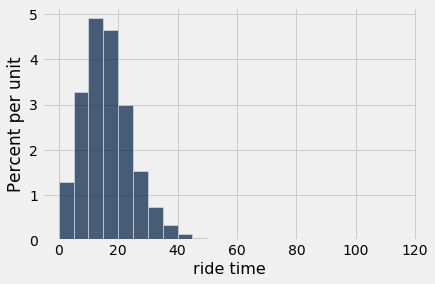

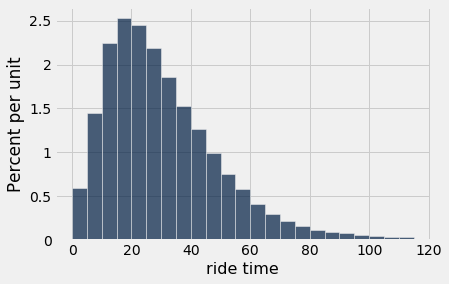

In [101]:
bins = np.arange(0, 120, 5)
boston.hist("ride time", bins = bins)
manila.hist("ride time", bins = bins)

**Question 2.** Set the two variables below to estimates of what percentage of rides are less than 10 minutes in Boston and Manila. Find your estimates by visually assessing the histograms. Your solution should consist of only mathematical operations and numbers.

In [102]:

boston_under_10 = (5 * 1.25) + (5 * 3.25)
manila_under_10 = (5 * 0.6) + (5 * 1.45)

**Question 3.** Comment on the main difference between the two histograms. What might be causing this?

**Your Answer Here**: The median ride time in Boston is smaller, and the spread of the ride times is larger in Manila. This could be due to the fact that Manila is a more densely populated city, and traffic is worse. Manila may also have worse infrastructure that makes traveling more difficult/ lengthy.  

**Question 4.** The `hod` column in each table represents the hour of the day during which the Uber was called. 0 corresponds to 12-1 AM, 1 to 1-2 AM, 13 to 1-2 PM, etc. Write a function which takes in a table like `boston` or `manila`, and an `hod` number between 0 and 23, and displays a histogram of ride lengths from that hour in that city. Use the same bins as before.

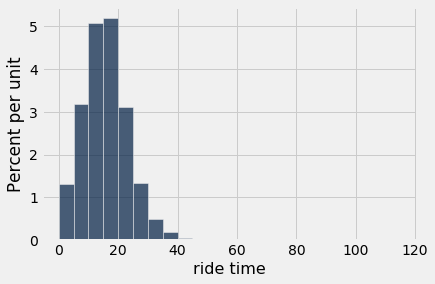

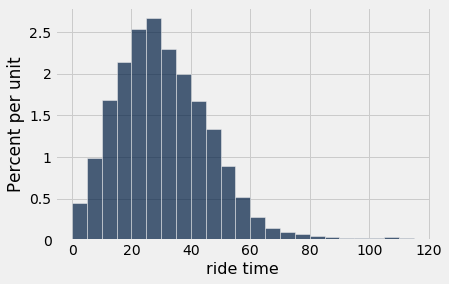

In [103]:
def hist_for_time(tbl, hod):
    bins = np.arange(0, 120, 5)
    table = tbl.where("hod",hod)
    return table.hist("ride time", bins = bins)

#DO NOT DELETE THIS LINE! 
hist_for_time(boston, 12)
hist_for_time(manila, 12)

**Question 5.** Which city has a larger difference between Uber ride times at 10 AM vs. 10 PM? In other words, which is larger: the difference between 10 AM and 10 PM Uber ride times in Manila or the difference between 10 AM and 10 PM uber ride times in Boston. Use the function you just created to answer this question. You do not need to calculate an actual difference.

Assign `larger_diff` to the number 1 if the answer is Manila, and 2 if the answer is Boston. 

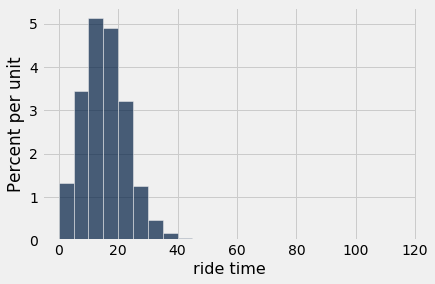

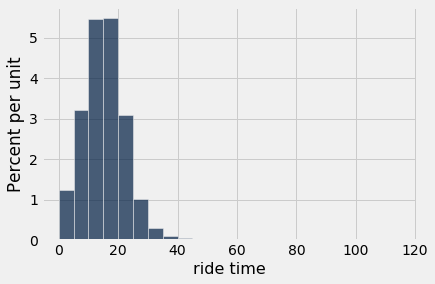

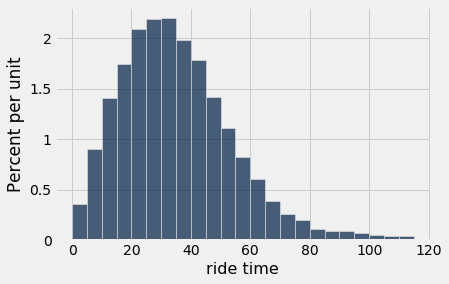

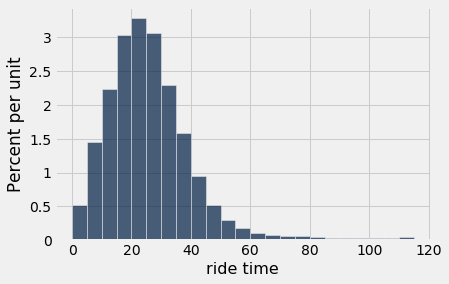

In [106]:
hist_for_time(boston, 10)
hist_for_time(boston, 22)
hist_for_time(manila, 10)
hist_for_time(manila, 22)
larger_diff = 1

In [107]:
_ = ok.grade('q2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Faculty salaries


In the next cell, we load a dataset created by the Cavalier Daily that is now available in [this Github repo](https://github.com/jennhuck/faculty-salaries-2017). It contains UVa faculty, their departments, their positions, and their gross salaries in 2017.

In [108]:
profs = Table.read_table("uva_salaries.csv")
profs

#profs table is already sorted in descending order of salary

Full.Name,Job.Title,Org.Major.Budget.Unit,Annual.Salary
Bronco Clay,Unit Paid Employee (Faculty),AT-Athletics,2.86654e+06
Richard P,Professor,HS-EVP for Health Affairs,742600
David S.,Professor,MD-School of Medicine,600000
Jayakrishna,Professor,MD-School of Medicine,590400
Irving L,Professor,MD-School of Medicine,561100
Teresa A.,President University of Virginia,PR-President's Office,559830
Robert O,Assoc Head Coach/Coord-FBASCHC153,AT-Athletics,550000
Scott C,Professor,DA-Darden School,540800
Larry,Lecturer,HS-EVP for Health Affairs,525000
Patrick D.,Chief Operating Officer-GA155,CO-Exec VP/COO,501600


We want to use this table to generate arrays with the names of each faculty member in each department.

**Question 1** Set `prof_names` to a table with two columns. The first column should be called "Org.Major.Budget.Unit" and have the name of every department once, and the second column should be called "names" and contain an *array* of the names of all faculty members in that department. 

*Hint:* Think about how ```group``` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to ```group```.

In [109]:
# Pick between the two functions defined below 
def identity(array):
    return array 

def first(array):
    return array.item(0)

In [110]:
prof_names = profs
prof_names = profs.drop(1,3).group("Org.Major.Budget.Unit", identity).relabeled(1, "names")
prof_names

Org.Major.Budget.Unit,names
AR-Architecture School,[' Ila L' ' Elizabeth K ' ' Karen' ' Ignacio Nicolas ' ' ...
AS-College of Arts & Sciences,[' Ian Bernard' ' John T III' ' Donald F ' ... ' Chao' ...
AT-Athletics,[' Bronco Clay' ' Robert O' ' Bronco Clay' ' Ruffin Horn ...
AT-IM-Sports,[' Jill' ' Scott Arthur' ' Edward R' ' Susan' ' Jason M' ...
BA-Frank Batten School,[' Allan C' ' Craig' ' Christopher J' ' William L ' ' Ge ...
BU-Business Operations,[' Richard A' ' Melissa F' ' Gary D' ' Zhiqiang ' ' Devi ...
BU-Dining Svcs,[' Linda' ' Dillard W' ' Thersea Mae' ' Gloria J' ' Barb ...
BU-Housing Div,[' Jessica R' ' Patricia L' ' Steven R ' ' Stephanie Ann ...
BU-Parking and Transportation,[' Rebecca ' ' Andrew Owen ' ' John Parks' ' Stephen Noe ...
BU-Printing and Copy Services,[' Kelly Alan' ' Cathie D' ' Stephen J' ' Melvin E' ' Da ...


In [111]:
_ = ok.grade('q3_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2** At the moment, the ```name``` column is sorted by last name. Would the arrays you generated in the previous part be the same if we had sorted by first name instead before generating them? Two arrays are the **same** if they contain the same number of elements and the elements located at corresponding indexes in the two arrays are identical. Explain your answer. If you feel you need to make certain assumptions about the data, feel free to state them in your response. 

No, the two arrays would not be the same. Group does a sequential search and the function above adds the names to the array in the order in which they appear in the table. Changing the original order would change the resuting array of applying the identity function.

(Also, there is no "name" column? And the "names" column is not currently sorted by last name; the profs table is sorted by salary in descending order)

**Question 3** Set `biggest_range_dept` to the name of the department with the largest salary range, where range is defined as the **difference between the lowest and highest salaries in the department**. 

*Hint:* First you'll need to define a new function `salary_range` which takes in an array of salaries and returns the salary range of the corresponding department. Then, set `department_ranges` to a table containing the names and salary ranges of each department. 

In [112]:
# Define salary_range in this cell
def salary_range(array_of_salaries):
    return(int(array_of_salaries[0]) - int(array_of_salaries[-1]))

In [113]:
department_ranges = profs.group("Org.Major.Budget.Unit", identity).drop(1,2)
array_of_salary_ranges = department_ranges.apply(salary_range, 1)
department_ranges = department_ranges.with_column("Salary Range", array_of_salary_ranges).sort("Salary Range", descending = True)
department_ranges.show(10)
biggest_range_dept = department_ranges.column(0).item(0)
biggest_range_dept

Org.Major.Budget.Unit,Annual.Salary identity,Salary Range
AT-Athletics,[2866538. 550000. 500000. 450000. 420000. 412000. ...,2855913
MD-School of Medicine,[600000. 590400. 561100. ... 10576. 10576. 10576.],589424
DA-Darden School,[540800. 393100. 391800. 379100. 371600. 347866. 331500. ...,528178
PR-President's Office,[559830. 404000. 235900. 206900. 188000. 186200. 164000. ...,525205
HS-EVP for Health Affairs,[742600. 525000. 250000.],492600
AS-College of Arts & Sciences,[500000. 465400. 309800. ... 10067. 10056. 10028.],489972
MC-McIntire School,[472200. 317300. 298000. 291800. 285000. 260000. 258000. ...,460200
CO-Exec VP/COO,[501600. 310000. 235000. 185000. 185000. 182000. 130000. ...,449600
DV-VP Office,[464100. 380000. 180000. 174500. 171850. 165000. 165000. ...,442600
LW-Law School,[453000. 362000. 361500. 340000. 335000. 334000. 332500. ...,441300


'AT-Athletics'

In [114]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 4. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [117]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw04.ipynb'.
Submit... 100% complete
Submission successful for user: rga2uz@virginia.edu
URL: https://okpy.org/uva/stat_1602/fa19/hw04/submissions/p8EJxy



In [118]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t